# DATA SCIENCE FINAL PROJECT By: Harshita Mira Venkatesh



## 1. Import Packages

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from bs4 import BeautifulSoup
import requests


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")



## 2. Load and Prep Data

#### 2.a Load wine ratings data

In [82]:
DATAPATH = "C:/Users/hmiravenkatesh/Desktop/GA/Projects/Final Project/wine-reviews/winemag-data-130k-v2.csv"

fields = ['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery', 'title']
wine_data = pd.read_csv(DATAPATH, usecols=fields)

#### 2.b View first 5 of ~130k wine ratings

In [84]:
# View first 5 of ~130K wine ratings
wine_data.head(5)


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## 3. Data Exploration

#### 3.a Check shape to make sure all the rows and columns were imported correctly

In [85]:
print("Number of Rows: {}".format(wine_data.shape[0]))
print("Number of Columns: {}".format(wine_data.shape[1]))



Number of Rows: 129971
Number of Columns: 11


##### The original Kaggle dataset was supposed to have ~130 columns and 10 + 1 columns (10 main columns + 1 title column), so the data seems to have imported correctly


#### 3.b List columns

In [86]:
wine_data.columns


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'title', 'variety', 'winery'],
      dtype='object')

#### 3.c Index according to row number

In [87]:
wine_data.reindex(index=range(0,wine_data.shape[0])) # set index to the row number
wine_data.head(4)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


#### 3.d Check data types

In [88]:
wine_data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
title           object
variety         object
winery          object
dtype: object

#### 3.e Run general summary stats

In [89]:
wine_data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


##### the below result seems to be telling us that price is missing in some instances since there are fewer counts of price then there are rows.

#### 3.f Check if there are missing values (especially for price)

In [90]:
pd.DataFrame(wine_data.isnull().sum(), columns=['Count of Nulls By Column']) # count total nulls

,Count of Nulls By Column
country,63
description,0
designation,37465
points,0
price,8996
province,63
region_1,21247
region_2,79460
title,0
variety,1


#### 3.g Check the values that each object field takes in order to see if certain fields need to be processed

##### 3.g.i Check the values that country takes

In [91]:
wine_data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

##### 3.g.ii Check the values that description takes

In [92]:
wine_data['description'].value_counts()

Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.                                                                                           3
Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.                                                                                                                                3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.             

##### 3.g.iii Check the values that the points field takes.

In [93]:
wine_data['points'].value_counts()

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

##### 3.g.iv Check the values that the province field takes

In [94]:
wine_data['province'].value_counts()

California                   36247
Washington                    8639
Bordeaux                      5941
Tuscany                       5897
Oregon                        5373
Burgundy                      3980
Northern Spain                3851
Piedmont                      3729
Mendoza Province              3264
Veneto                        2716
New York                      2688
Alsace                        2440
Northeastern Italy            2138
Loire Valley                  1856
Sicily & Sardinia             1797
Champagne                     1613
Southwest France              1503
Southern Italy                1349
South Australia               1349
Provence                      1346
Douro                         1281
Central Italy                 1233
Catalonia                     1164
Rhône Valley                  1081
Beaujolais                    1044
Mosel                         1039
Alentejano                     937
Colchagua Valley               830
Marlborough         

##### 3.g.v Check the values that the title field takes

In [95]:
wine_data['title'].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                             11
Korbel NV Brut Sparkling (California)                                               9
Segura Viudas NV Extra Dry Sparkling (Cava)                                         8
Ruinart NV Brut Rosé  (Champagne)                                                   7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                                7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                             7
Mumm Napa NV Brut Prestige Sparkling (Napa Valley)                                  6
Boizel NV Brut Réserve  (Champagne)                                                 6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)                  6
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                                     6
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)                           6
Korbel NV Sweet Rosé Sparkling (California)           

##### 3.g.vi Check the values that the variety field takes

In [96]:
wine_data['variety'].value_counts()

Pinot Noir                        13272
Chardonnay                        11753
Cabernet Sauvignon                 9472
Red Blend                          8946
Bordeaux-style Red Blend           6915
Riesling                           5189
Sauvignon Blanc                    4967
Syrah                              4142
Rosé                               3564
Merlot                             3102
Nebbiolo                           2804
Zinfandel                          2714
Sangiovese                         2707
Malbec                             2652
Portuguese Red                     2466
White Blend                        2360
Sparkling Blend                    2153
Tempranillo                        1810
Rhône-style Red Blend              1471
Pinot Gris                         1455
Champagne Blend                    1396
Cabernet Franc                     1353
Grüner Veltliner                   1345
Portuguese White                   1159
Bordeaux-style White Blend         1066


##### 3.g.vii Check the values that winery takes

In [97]:
wine_data['winery'].value_counts()

Wines & Winemakers               222
Testarossa                       218
DFJ Vinhos                       215
Williams Selyem                  211
Louis Latour                     199
Georges Duboeuf                  196
Chateau Ste. Michelle            194
Concha y Toro                    164
Columbia Crest                   159
Kendall-Jackson                  130
Siduri                           126
Gary Farrell                     125
Lynmar                           118
Albert Bichot                    117
Montes                           117
Trapiche                         113
Undurraga                        113
Casa Santos Lima                 113
Jean-Luc and Paul Aegerter       113
Robert Mondavi                   112
Santa Ema                        112
Chanson Père et Fils             109
Fess Parker                      108
V. Sattui                        107
Iron Horse                       106
Foxen                            105
Louis Jadot                      104
C

## 4. Data Processing

#### 4.a For the purposes of our analysis, we drop instances where certain predictor variables are missing. 

In [98]:
wine_data = wine_data[wine_data['price'].notnull()]
wine_data = wine_data[wine_data['country'].notnull()]
wine_data = wine_data[wine_data['variety'].notnull()]

pd.DataFrame(wine_data.isnull().sum(), columns=['Count of Nulls By Column']) # count total nulls 

,Count of Nulls By Column
country,0
description,0
designation,34767
points,0
price,0
province,0
region_1,19515
region_2,70623
title,0
variety,0


#### 4.b We need to extract vintage from the variable 'title' where it is available

In [99]:
string_title = wine_data.title
year_pattern = re.compile('(?<=\s)(?P<vintage>19\d\d|20\d\d)(?=\s)')

In [100]:
vintage_list = [year_pattern.search(i).group('vintage') for i in wine_data.head(5).title]
vintage = []

def get_vintage(row):
    try:
        return year_pattern.search(row.title).group('vintage')
    except AttributeError:
        return None

print(wine_data.iloc[56].description) # there was an issue in row 56, since the title contained no vintage
#get_vintage(wine_data.iloc[56])

This fat, yeasty Champagne is comprised predominantly of Pinot Noir. It has ripe red berry fruit, light acidity and a soft, creamy aftertaste. It's ready to drink.


In [101]:
wine_data['vintage'] = wine_data.apply(lambda row: get_vintage(row), axis = 1)
wine_data['vintage'] = pd.to_numeric(wine_data['vintage'])

In [102]:
wine_data.head(60)


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012.0
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013.0
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012.0
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011.0


In [103]:
wine_data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
title           object
variety         object
winery          object
vintage        float64
dtype: object

In [104]:
pd.DataFrame(wine_data.isnull().sum(), columns=['Count of Nulls By Column']) # count total nulls 

# vintage has ~ 4150 nulls


,Count of Nulls By Column
country,0
description,0
designation,34767
points,0
price,0
province,0
region_1,19515
region_2,70623
title,0
variety,0


#### 4.c Create Oak Dummy.

##### According to several critics, having a rich oak flavor is a mark of wine quality and in order to have a bold oak flavor, wine needs to be aged in oak barrels, which is a very expensive process, which I theorize as being more expensive.

In [105]:
wine_data['is_oak_temp'] = wine_data['description'].str.contains('oak', regex=True)
wine_data['is_oak'] = wine_data.is_oak_temp.map({False:0.0, True:1.0})

wine_data.is_oak.value_counts
wine_data.head(15)

wine_data = wine_data.drop(['is_oak_temp'], axis=1)

In [106]:
pd.DataFrame(wine_data.isnull().sum(), columns=['Count of Nulls By Column']) # count total nulls 

,Count of Nulls By Column
country,0
description,0
designation,34767
points,0
price,0
province,0
region_1,19515
region_2,70623
title,0
variety,0


#### 4.d Classify countries into wine-belt countries.

##### Several of the most expensive varieties of wine in the world are from the 'wine belt of Europe', see: https://en.wikipedia.org/wiki/Alcohol_belts_of_Europe#cite_note-Karlsson-1. So I attempt to create indicators for wine belt countries. Countries in the wine belt include Spain, Portugal, Italy, Azerbaijan, Armenia, Georgia, Greece, Cyprus, Albania, Macedonia, Serbia, Montenegro, Croatia, Bulgaria, Turkey, most of Austria, San Marino, Switzerland, Romania, France, Southern Federal District of Russia , Hungary and Slovenia. I exclude Russia from the wine belt indicator since the majority of the country falls under the spirit belt



In [107]:
wine_data.groupby(['country']).country.count()

country
Argentina                  3756
Armenia                       2
Australia                  2294
Austria                    2799
Bosnia and Herzegovina        2
Brazil                       47
Bulgaria                    141
Canada                      254
Chile                      4415
China                         1
Croatia                      71
Cyprus                       11
Czech Republic               12
England                      69
France                    17776
Georgia                      84
Germany                    2120
Greece                      461
Hungary                     145
India                         9
Israel                      489
Italy                     16914
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1378
Peru                         16
Portugal                   4875


In [108]:
wine_data['is_winebelt'] = wine_data.country.map({'Uruguay':0, "Spain":1, "Portugal":1, "Italy":1, "Azerbaijan":1, "Armenia":1, "Georgia":1, "Greece":1, "Cyprus":1, "Albania":1, "Macedonia":1, "Serbia":1, "Montenegro":1, "Croatia":1, "Bulgaria":1, "Turkey":1, "Austria":1, "Switzerland":1, "Romania":1, "France":1, "Hungary":1, "Slovenia":1, "Italy":1})
wine_data['is_winebelt'].fillna(0, inplace=True)   
wine_data.head(4)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,vintage,is_oak,is_winebelt
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,0.0,1.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,0.0,0.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,0.0,0.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,0.0,0.0


#### 4.e Encode the variety variable using the Lab Encoder Package

In [109]:
wine_data.groupby(['variety']).variety.count()

lb = LabelEncoder()
wine_data["variety_code"] = lb.fit_transform(wine_data["variety"])
wine_data[["variety_code", "variety"]].head(11)


,variety_code,variety
1,442,Portuguese Red
2,428,Pinot Gris
3,471,Riesling
4,432,Pinot Noir
5,579,Tempranillo-Merlot
6,182,Frappato
7,205,Gewürztraminer
8,205,Gewürztraminer
9,428,Pinot Gris
10,78,Cabernet Sauvignon


#### 4.f Encode the Province variable using the Lab Encoder Package

In [110]:
wine_data.groupby(['province']).variety.count()

lb = LabelEncoder()
wine_data["province_code"] = lb.fit_transform(wine_data["province"])
wine_data[["province_code", "province"]].head(11)


,province_code,province
1,107,Douro
2,266,Oregon
3,216,Michigan
4,266,Oregon
5,260,Northern Spain
6,328,Sicily & Sardinia
7,11,Alsace
8,304,Rheinhessen
9,11,Alsace
10,51,California


In [111]:
pd.DataFrame(wine_data.isnull().sum(), columns=['Count of Nulls By Column']) # count total nulls

,Count of Nulls By Column
country,0
description,0
designation,34767
points,0
price,0
province,0
region_1,19515
region_2,70623
title,0
variety,0


## 5. Modeling

In [112]:
wine_data.dtypes

country           object
description       object
designation       object
points             int64
price            float64
province          object
region_1          object
region_2          object
title             object
variety           object
winery            object
vintage          float64
is_oak           float64
is_winebelt      float64
variety_code       int32
province_code      int32
dtype: object

#### 5.a Find a suitable model by adding variables incrementally

In [113]:
import statsmodels.formula.api as smf

# Test multiple models before finding a suitable set of predictiors or X variables.
formulas = {
    "case1": "price ~ points ", 
    "case2": "price ~ points + vintage",
    "case3": "price ~ points + vintage + is_oak",
    "case4": "price ~ points + vintage + is_oak + is_winebelt",
    "case5": "price ~ points + vintage + is_oak + is_winebelt + variety_code + province_code" 
}

model1 = smf.ols(formula=formulas['case1'], data=wine_data) # Print the output of my regression
result1 = model1.fit()

model2 = smf.ols(formula=formulas['case2'], data=wine_data) # Print the output of my regression
result2 = model2.fit()

model3 = smf.ols(formula=formulas['case3'], data=wine_data) # Print the output of my regression
result3 = model3.fit()

model4 = smf.ols(formula=formulas['case4'], data=wine_data) # Print the output of my regression
result4 = model4.fit()

model5 = smf.ols(formula=formulas['case5'], data=wine_data) # Print the output of my regression
result5 = model5.fit()

print(result1.summary())
print(result2.summary())
print(result3.summary())
print(result4.summary())
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 2.533e+04
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:06:21   Log-Likelihood:            -6.0919e+05
No. Observations:              120915   AIC:                         1.218e+06
Df Residuals:                  120913   BIC:                         1.218e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -460.5281      3.118   -147.723      0.0

##### It seems that adding more variables is increasing my R-squared value. The highest R-squared value is in case 5, while this does not necessarily mean the model is getting better. So selecting a model based on R^2 alone may not be the best idea. Instead I am going to employ Akaike Information Criterion (AIC) to estimate the quality of my statistical model. AIC statistical estimation helps predict accuracy while also controlling for number of parameters. I use this to evaluate the models in the above. Looking at the AIC outputs, the last three models seem to have the lowest AIC, and the last model (case 5) seems to have the largest R^2 as well. So I am going to use the model in case 5.

##### Looking at the results from model 5, our findings are as follows: as points increases, so does price by the increment specified in the above table. This makes sense since points are a rating from 1-100 of quality. With respect to vintage, it seems that the older the wine is, the more expensive it becomes, which we also expect. it seems as if having an oak flavor and being from 'wine belt' regions of the world also increases price as shown in the above table. The coeffecients on variety code and province code are harder to interpret since these are purely categorical variables. 

#### 5.b Test for multi-collinearity in the case 5 model.

                vintage    is_oak  is_winebelt  variety_code  province_code
vintage        1.000000 -0.063826     0.035326      0.018554      -0.037982
is_oak        -0.063826  1.000000    -0.167342     -0.096918      -0.065759
is_winebelt    0.035326 -0.167342     1.000000      0.052398       0.158415
variety_code   0.018554 -0.096918     0.052398      1.000000       0.118568
province_code -0.037982 -0.065759     0.158415      0.118568       1.000000
AxesSubplot(0.08,0.07;0.696x0.81)


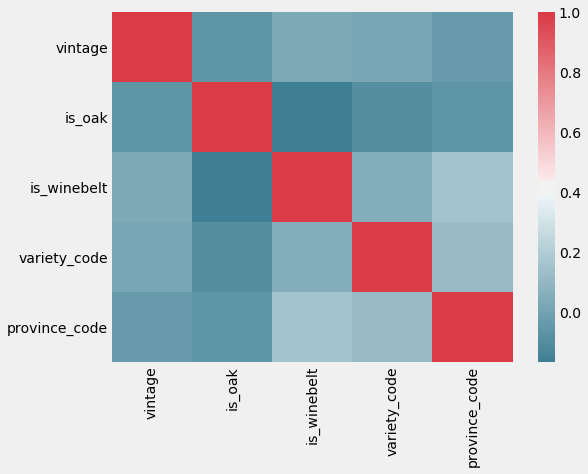

In [114]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlation = wine_data [['vintage', 'is_oak', 'is_winebelt', 'variety_code', 'province_code']].corr()
print(correlation)
print(sns.heatmap(correlation, cmap=cmap))

##### Based on the results in the above heatmap multi-collinearity does not seem to be a big issue.


#### 3.c K-Fold Cross-validation:  Using the predictors I found in case 5 above I define X and Y and perform a K-fold cross validation using 5-10 folds

In [115]:
feature_cols = ['points', 'is_winebelt', 'variety_code', 'province_code', 'is_oak']

X = wine_data[feature_cols]
y = wine_data.price

from sklearn import model_selection

for fold_number in range(5,11):
    kf = model_selection.KFold(n_splits=fold_number, shuffle=True)

    mse_values = []
    rmse_values = []
    scores = []
    n = 0
    
    str_fold_number = str(fold_number)
    print("\n~~~~ CROSS VALIDATION each fold ~~~" + " NUMBER OF FOLDS: " + str_fold_number)
    for train_index, test_index in kf.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
        
        rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
        scores.append(lr.score(X, y))

        n += 1

        print('Model {}'.format(n))
        print('MSE: {}'.format(mse_values[n-1]))
        print('RMSE: {}'.format(rmse_values[n-1]))
        print('R2: {}\n'.format(scores[n-1]))


    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~" + " NUMBER OF FOLDS: " + str_fold_number)
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
    print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))




~~~~ CROSS VALIDATION each fold ~~~ NUMBER OF FOLDS: 5
Model 1
MSE: 1571.6167055070375
RMSE: 39.643621246135396
R2: 0.1806921726427564

Model 2
MSE: 1160.6197055442015
RMSE: 34.06786910777076
R2: 0.18070341856479544

Model 3
MSE: 1266.8503733467742
RMSE: 35.59284160258596
R2: 0.18070324961201212

Model 4
MSE: 1192.9136294436175
RMSE: 34.53858175205834
R2: 0.18070263150896704

Model 5
MSE: 1705.3228918033521
RMSE: 41.29555535167619
R2: 0.1807034727274955

~~~~ SUMMARY OF CROSS VALIDATION ~~~~ NUMBER OF FOLDS: 5
Mean of MSE for all folds: 1379.4646611289966
Mean of RMSE for all folds: 37.027693812045335
Mean of R2 for all folds: 0.1807009890112053

~~~~ CROSS VALIDATION each fold ~~~ NUMBER OF FOLDS: 6
Model 1
MSE: 1680.4712957689983
RMSE: 40.99355188037502
R2: 0.18070831769577514

Model 2
MSE: 1019.2029922459099
RMSE: 31.924958766549878
R2: 0.18068248703176384

Model 3
MSE: 1066.811756880022
RMSE: 32.66208439276376
R2: 0.18070869612085058

Model 4
MSE: 1770.3507457495168
RMSE: 42.07553

##### With respect to the above models, the model with 10 folds seems most optimal (lowest RMSE and MSE). But that does not mean that it doesn't suffer from a bias variange issue.


## 6. BONUS PROJECT: Web Scraping Book Website

##### I performed webscraping on a website specifically used for scraping practice: http://books.toscrape.com/

#### 6.a Visit URL, grab html, convert to soup objects and print prices of books

In [160]:

from bs4 import BeautifulSoup

url = "http://books.toscrape.com/"
# visit that url, and grab the html of said page
html = requests.get(url)

# .text returns the request content in Unicode
html.text[:500]

# convert this into a soup object
soup = BeautifulSoup(html.text, 'html.parser')

# print the prices on the website
soup.find_all(name='p', attrs={'class':'price_color'})

[<p class="price_color">Â£51.77</p>,
 <p class="price_color">Â£53.74</p>,
 <p class="price_color">Â£50.10</p>,
 <p class="price_color">Â£47.82</p>,
 <p class="price_color">Â£54.23</p>,
 <p class="price_color">Â£22.65</p>,
 <p class="price_color">Â£33.34</p>,
 <p class="price_color">Â£17.93</p>,
 <p class="price_color">Â£22.60</p>,
 <p class="price_color">Â£52.15</p>,
 <p class="price_color">Â£13.99</p>,
 <p class="price_color">Â£20.66</p>,
 <p class="price_color">Â£17.46</p>,
 <p class="price_color">Â£52.29</p>,
 <p class="price_color">Â£35.02</p>,
 <p class="price_color">Â£57.25</p>,
 <p class="price_color">Â£23.88</p>,
 <p class="price_color">Â£37.59</p>,
 <p class="price_color">Â£51.33</p>,
 <p class="price_color">Â£45.17</p>]

#### 6.b List the prices of books on the homepage of the website

In [172]:
prices_list = []
# for each element you find, print out the price
for entry in soup.find_all(name='p', attrs={'class':'price_color'}):
    print(entry.text)
    prices_list.append(entry.text)

prices_list

Â£51.77
Â£53.74
Â£50.10
Â£47.82
Â£54.23
Â£22.65
Â£33.34
Â£17.93
Â£22.60
Â£52.15
Â£13.99
Â£20.66
Â£17.46
Â£52.29
Â£35.02
Â£57.25
Â£23.88
Â£37.59
Â£51.33
Â£45.17


['Â£51.77',
 'Â£53.74',
 'Â£50.10',
 'Â£47.82',
 'Â£54.23',
 'Â£22.65',
 'Â£33.34',
 'Â£17.93',
 'Â£22.60',
 'Â£52.15',
 'Â£13.99',
 'Â£20.66',
 'Â£17.46',
 'Â£52.29',
 'Â£35.02',
 'Â£57.25',
 'Â£23.88',
 'Â£37.59',
 'Â£51.33',
 'Â£45.17']

#### 6.c Print book titles in a list

In [174]:
titles_list = []

for row in soup.find_all("h3"):
    print(row.text)
    titles_list.append(row.text) 

titles_list

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]